# Analysis of Motor Vehicles and Electric Vehicle carbon emission per vehicle.

In [94]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

In [96]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [97]:
from termcolor import colored

In [98]:
cmp_data=pd.read_excel('EV VS Motor Cars.xlsx')

In [99]:
cmp_data

,Year,EV sales BEV,EV sales PHEV,EV Stock BEV,EV Stock PHEV,Electricity demand BEV,Electricity demand BHEV,Oil displacement (Million barrels per day),Oil displacement (Milion litres gasoline equivalent),Average CO2 emission per BEV produced (Kg CO2e),Average CO2 emission per PHEV produced (Kg CO2e),Total Motor cars production per year,"Average CO2 emission per Moto car,"
0,2010,7400,380,17000,400,NaN,NaN,1,32,185640000,4368000,58239494,267901672400
1,2011,40000,9100,55000,9500,NaN,NaN,2,87,600600000,103740000,59897273,275527455800
2,2012,59000,61000,120000,70000,NaN,NaN,3,190,1310400000,764400000,63081024,290172710400
3,2013,110000,92000,230000,160000,NaN,NaN,8,440,2511600000,1747200000,65745403,302428853800
4,2014,190000,130000,410000,300000,NaN,NaN,14,830,4477200000,3276000000,67782035,311797361000
5,2015,330000,220000,730000,520000,2200.0,420.0,2,1300,7971600000,5678400000,68539516,315281773600
6,2016,470000,290000,1200000,810000,3400.0,630.0,3,2000,13104000000,8845200000,72105435,331685001000
7,2017,760000,420000,1900000,1200000,5300.0,920.0,5,2900,20748000000,13104000000,73456531,337900042600
8,2018,1400000,640000,3300000,1800000,8900.0,1400.0,8,4800,36036000000,19656000000,70498388,324292584800
9,2019,1500000,580000,4800000,2400000,13000.0,1700.0,12,6900,52416000000,26208000000,67149196,308886301600


In [100]:
cmp_data.shape

(12, 13)

In [101]:
cmp_data.describe()

,Year,EV sales BEV,EV sales PHEV,EV Stock BEV,EV Stock PHEV,Electricity demand BEV,Electricity demand BHEV,Oil displacement (Million barrels per day),Oil displacement (Milion litres gasoline equivalent),Average CO2 emission per BEV produced (Kg CO2e),Average CO2 emission per PHEV produced (Kg CO2e),Total Motor cars production per year,"Average CO2 emission per Moto car,"
count,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,7.000000,7.000000,12.000000,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,2015.500000,9.638667e+05,4.435400e+05,2.555167e+06,1.322492e+06,11257.142857,1538.571429,7.916667,3423.250000,2.790242e+10,1.444161e+10,6.494859e+07,2.987635e+11
std,3.605551,1.352179e+06,5.472024e+05,3.437958e+06,1.626465e+06,9252.361346,1044.771563,6.584532,4134.263771,3.754250e+10,1.776100e+10,6.031805e+06,2.774630e+10
min,2010.000000,7.400000e+03,3.800000e+02,1.700000e+04,4.000000e+02,2200.000000,420.000000,1.000000,32.000000,1.856400e+08,4.368000e+06,5.583446e+07,2.568385e+11
25%,2012.750000,9.725000e+04,8.425000e+04,2.025000e+05,1.375000e+05,4350.000000,775.000000,2.750000,377.500000,2.211300e+09,1.501500e+09,5.948283e+07,2.736210e+11
50%,2015.500000,4.000000e+05,2.550000e+05,9.650000e+05,6.650000e+05,8900.000000,1400.000000,6.500000,1650.000000,1.053780e+10,7.261800e+09,6.644730e+07,3.056576e+11
75%,2018.250000,1.425000e+06,5.950000e+05,3.675000e+06,1.950000e+06,15500.000000,2000.000000,12.500000,5325.000000,4.013100e+10,2.129400e+10,6.902923e+07,3.175345e+11
max,2021.000000,4.700000e+06,1.900000e+06,1.100000e+07,5.200000e+06,28000.000000,3400.000000,22.000000,13000.000000,1.201200e+11,5.678400e+10,7.345653e+07,3.379000e+11


In [102]:
cmp_data.rename(columns = {'Average CO2 emission per Moto car,':'Average CO2 emission per Moto car'}, inplace = True)
cmp_data.head()

,Year,EV sales BEV,EV sales PHEV,EV Stock BEV,EV Stock PHEV,Electricity demand BEV,Electricity demand BHEV,Oil displacement (Million barrels per day),Oil displacement (Milion litres gasoline equivalent),Average CO2 emission per BEV produced (Kg CO2e),Average CO2 emission per PHEV produced (Kg CO2e),Total Motor cars production per year,Average CO2 emission per Moto car
0,2010,7400,380,17000,400,NaN,NaN,1,32,185640000,4368000,58239494,267901672400
1,2011,40000,9100,55000,9500,NaN,NaN,2,87,600600000,103740000,59897273,275527455800
2,2012,59000,61000,120000,70000,NaN,NaN,3,190,1310400000,764400000,63081024,290172710400
3,2013,110000,92000,230000,160000,NaN,NaN,8,440,2511600000,1747200000,65745403,302428853800
4,2014,190000,130000,410000,300000,NaN,NaN,14,830,4477200000,3276000000,67782035,311797361000


In [103]:
cmp_data.isnull()

,Year,EV sales BEV,EV sales PHEV,EV Stock BEV,EV Stock PHEV,Electricity demand BEV,Electricity demand BHEV,Oil displacement (Million barrels per day),Oil displacement (Milion litres gasoline equivalent),Average CO2 emission per BEV produced (Kg CO2e),Average CO2 emission per PHEV produced (Kg CO2e),Total Motor cars production per year,Average CO2 emission per Moto car
0,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [104]:
cmp_data.isnull().sum()

Year                                                    0
EV sales BEV                                            0
EV sales PHEV                                           0
EV Stock BEV                                            0
EV Stock PHEV                                           0
Electricity demand BEV                                  5
Electricity demand BHEV                                 5
Oil displacement (Million barrels per day)              0
Oil displacement (Milion litres gasoline equivalent)    0
Average CO2 emission per BEV produced (Kg CO2e)         0
Average CO2 emission per PHEV produced (Kg CO2e)        0
Total Motor cars production per year                    0
Average CO2 emission per Moto car                       0
dtype: int64

In [105]:
cmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Year                                                  12 non-null     int64  
 1   EV sales BEV                                          12 non-null     int64  
 2   EV sales PHEV                                         12 non-null     int64  
 3   EV Stock BEV                                          12 non-null     int64  
 4   EV Stock PHEV                                         12 non-null     int64  
 5   Electricity demand BEV                                7 non-null      float64
 6   Electricity demand BHEV                               7 non-null      float64
 7   Oil displacement (Million barrels per day)            12 non-null     int64  
 8   Oil displacement (Milion litres gasoline equivalent)  12 non-n

In [106]:
cmp_data.columns

Index(['Year', 'EV sales BEV', 'EV sales PHEV', 'EV Stock BEV',
       'EV Stock PHEV', 'Electricity demand BEV', 'Electricity demand BHEV',
       'Oil displacement (Million barrels per day)',
       'Oil displacement (Milion litres gasoline equivalent)',
       'Average CO2 emission per BEV produced (Kg CO2e)',
       'Average CO2 emission per PHEV produced (Kg CO2e)',
       'Total Motor cars production per year',
       'Average CO2 emission per Moto car'],
      dtype='object')

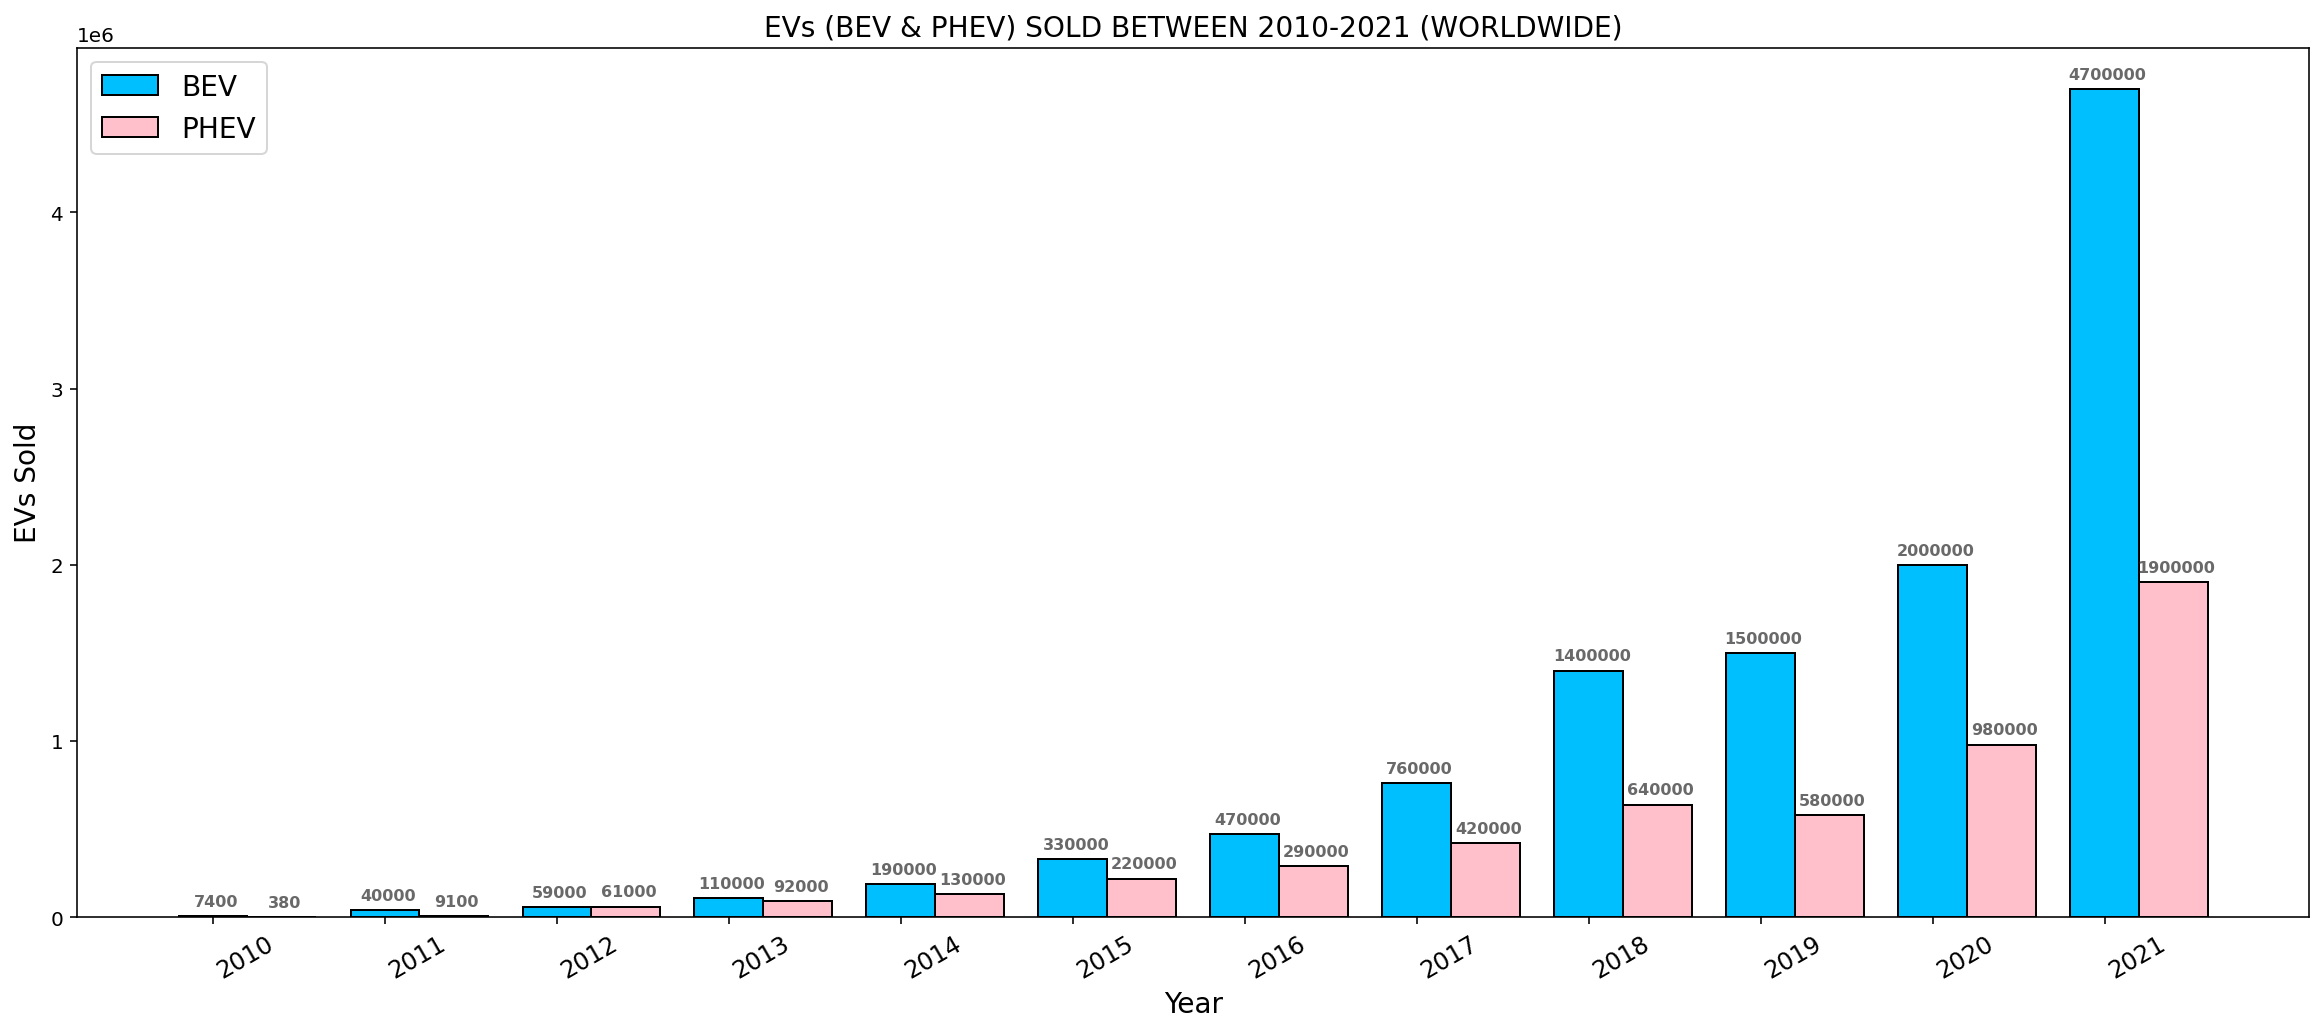

In [107]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rc('font', family='Open Sans')

def autolabel(rectangle_group):
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height),
                    xy=(rect.get_x()+rect.get_width()/2,height),
                    ha='center',
                    xytext=(1.5,5),
                    textcoords='offset points',
                    color='dimgrey',
                    fontsize=8,fontweight='bold')

width = 0.4
x_bev = [x-width for x in range(len(cmp_data.Year))]
x_phev = [x for x in range(len(cmp_data.Year))]
fig,ax = plt.subplots()

rect1 = ax.bar(x_bev, cmp_data['EV sales BEV'], width, color='deepskyblue',
               label='BEV', edgecolor='black', tick_label=cmp_data.Year)
rect2 = ax.bar(x_phev, cmp_data['EV sales PHEV'], width, color='pink',
               label='PHEV', edgecolor='black')

autolabel(rect1)
autolabel(rect2)

ax.set_title('EVs (BEV & PHEV) SOLD BETWEEN 2010-2021 (WORLDWIDE)',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('EVs Sold',fontsize=14)
ax.legend(fontsize=14)

# Adjust the horizontal alignment of tick labels to the right
ax.set_xticklabels(cmp_data.Year, ha='left',fontsize=12)
plt.xticks(rotation=30)
plt.show()



# Conclusion: Battery Electric Vehicles are more popular among customers than Plugin Hybrid Electric Vehicles.

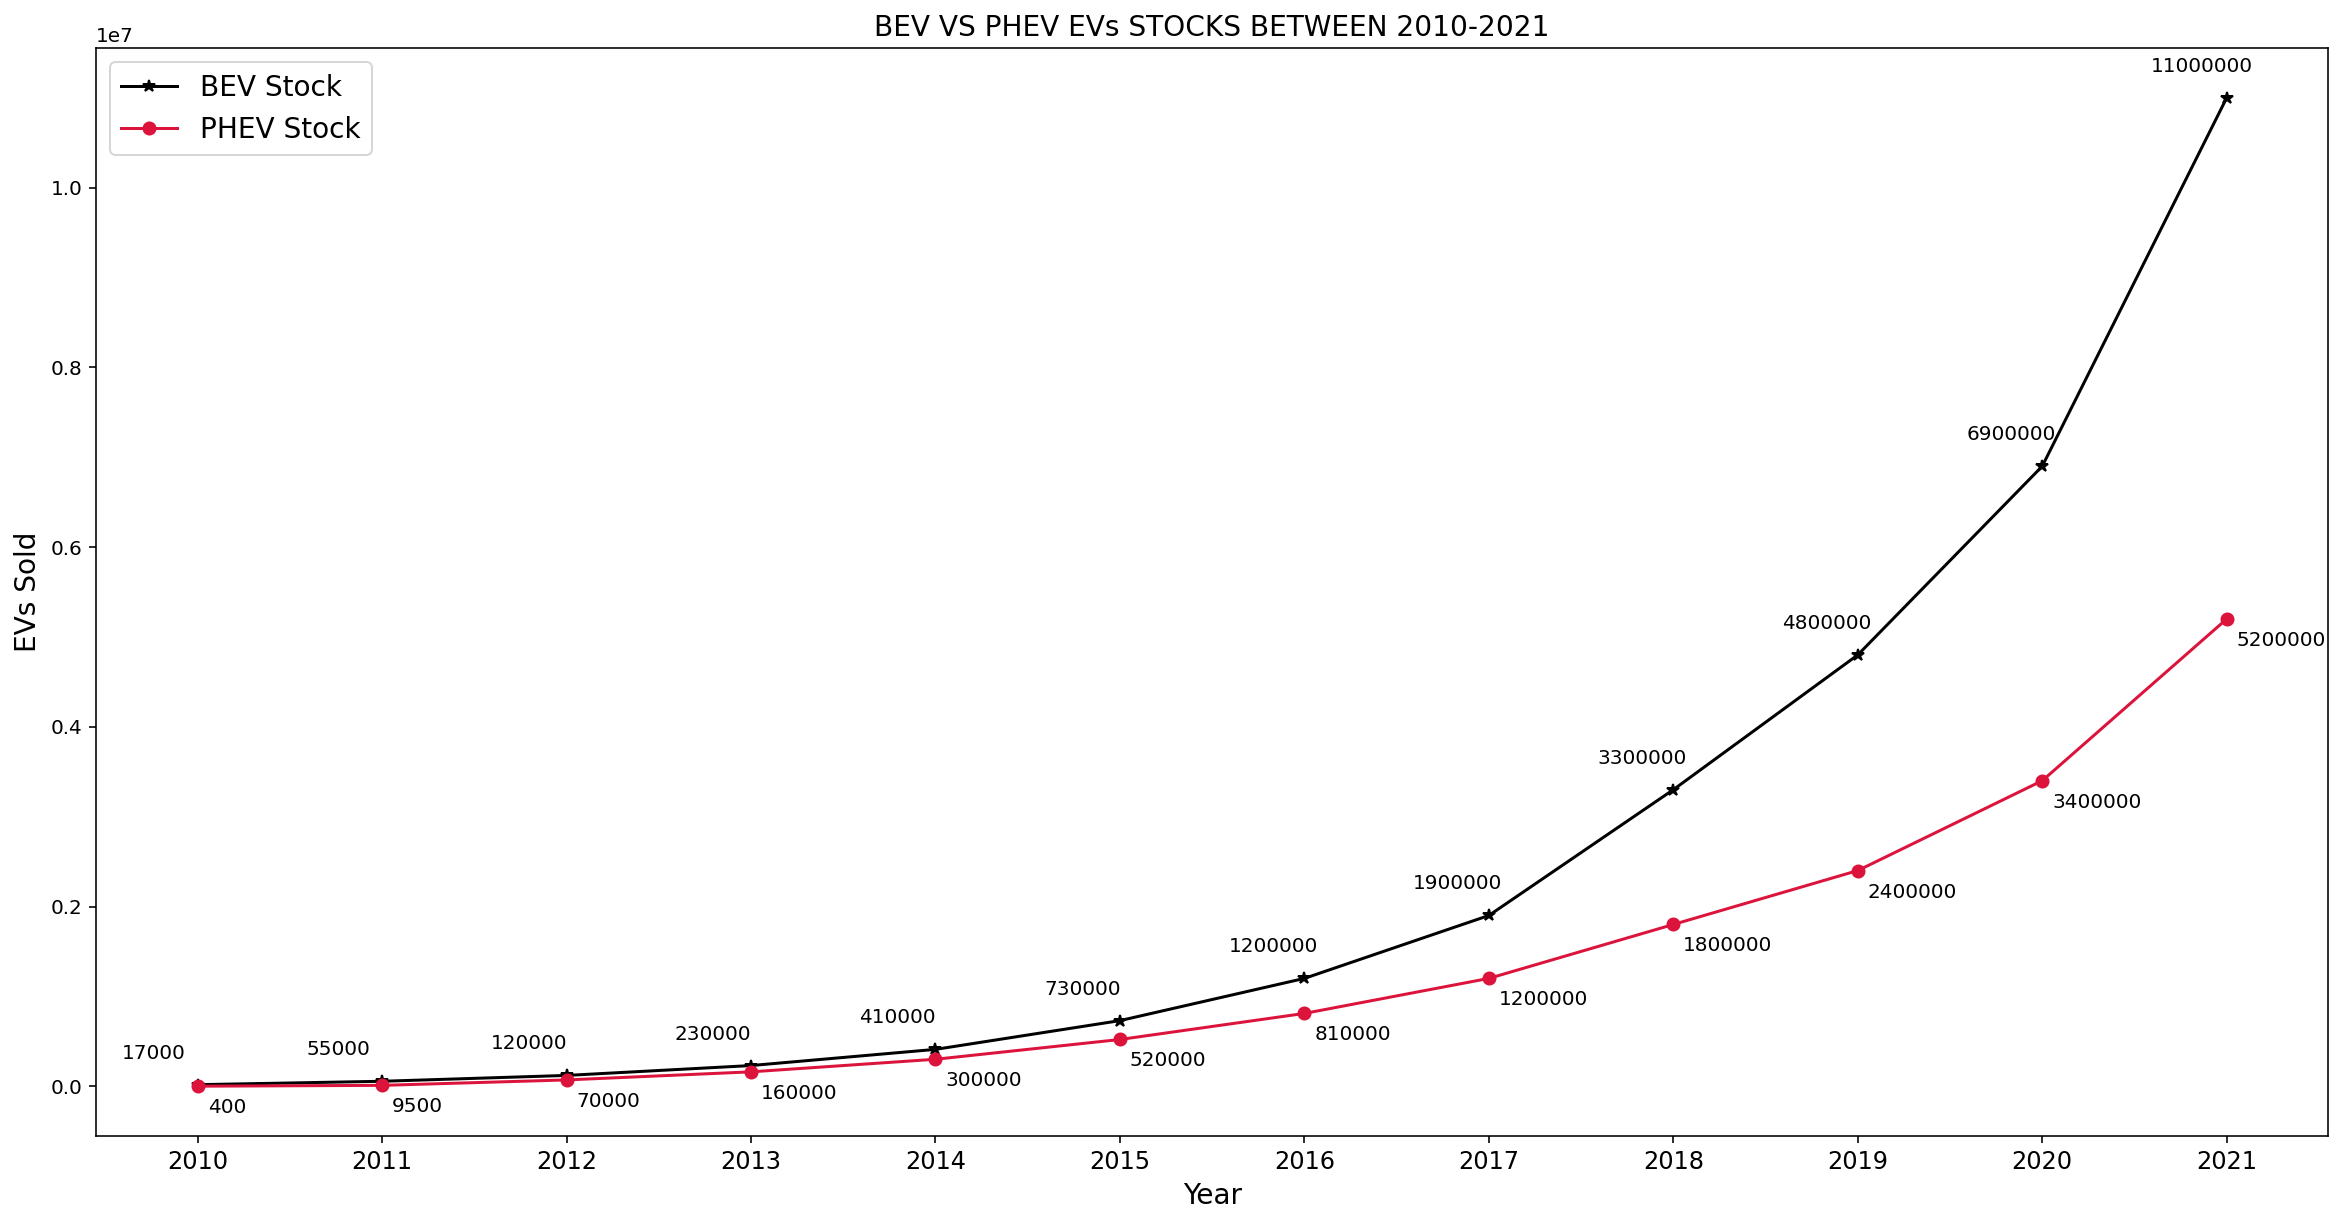

In [114]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', family='Open Sans')

fig,ax = plt.subplots()

# plot EV Stock BEV and add annotations to each point
ax.plot(cmp_data['EV Stock BEV'], color='black', marker='*', label='BEV Stock')
for i, val in enumerate(cmp_data['EV Stock BEV']):
    ax.annotate('{:.0f}'.format(val), xy=(i, val), 
                xytext=(-38, 11), textcoords='offset points', 
                fontsize=10, va='bottom')

# plot EV Stock PHEV and add annotations to each point    
ax.plot(cmp_data['EV Stock PHEV'], color='crimson', marker='o', label='PHEV Stock')
for i, val in enumerate(cmp_data['EV Stock PHEV']):
    ax.annotate('{:.0f}'.format(val), xy=(i, val), 
                xytext=(5, -6), textcoords='offset points', 
                fontsize=10, va='top')

ax.set_title('BEV VS PHEV EVs STOCKS BETWEEN 2010-2021',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('EVs Sold',fontsize=14)
ax.legend(fontsize=14)

# Set tick positions to integers and set tick labels to corresponding year values
tick_pos = range(len(cmp_data))
tick_label = cmp_data.Year
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_label, ha='center', fontsize=12)

plt.show()


# Conclusion: Battery Electric Vehicle's stocks are more valuable than Plugin Hybrid Electric Vehicle.

In [109]:
cmp_data.head()

,Year,EV sales BEV,EV sales PHEV,EV Stock BEV,EV Stock PHEV,Electricity demand BEV,Electricity demand BHEV,Oil displacement (Million barrels per day),Oil displacement (Milion litres gasoline equivalent),Average CO2 emission per BEV produced (Kg CO2e),Average CO2 emission per PHEV produced (Kg CO2e),Total Motor cars production per year,Average CO2 emission per Moto car
0,2010,7400,380,17000,400,NaN,NaN,1,32,185640000,4368000,58239494,267901672400
1,2011,40000,9100,55000,9500,NaN,NaN,2,87,600600000,103740000,59897273,275527455800
2,2012,59000,61000,120000,70000,NaN,NaN,3,190,1310400000,764400000,63081024,290172710400
3,2013,110000,92000,230000,160000,NaN,NaN,8,440,2511600000,1747200000,65745403,302428853800
4,2014,190000,130000,410000,300000,NaN,NaN,14,830,4477200000,3276000000,67782035,311797361000


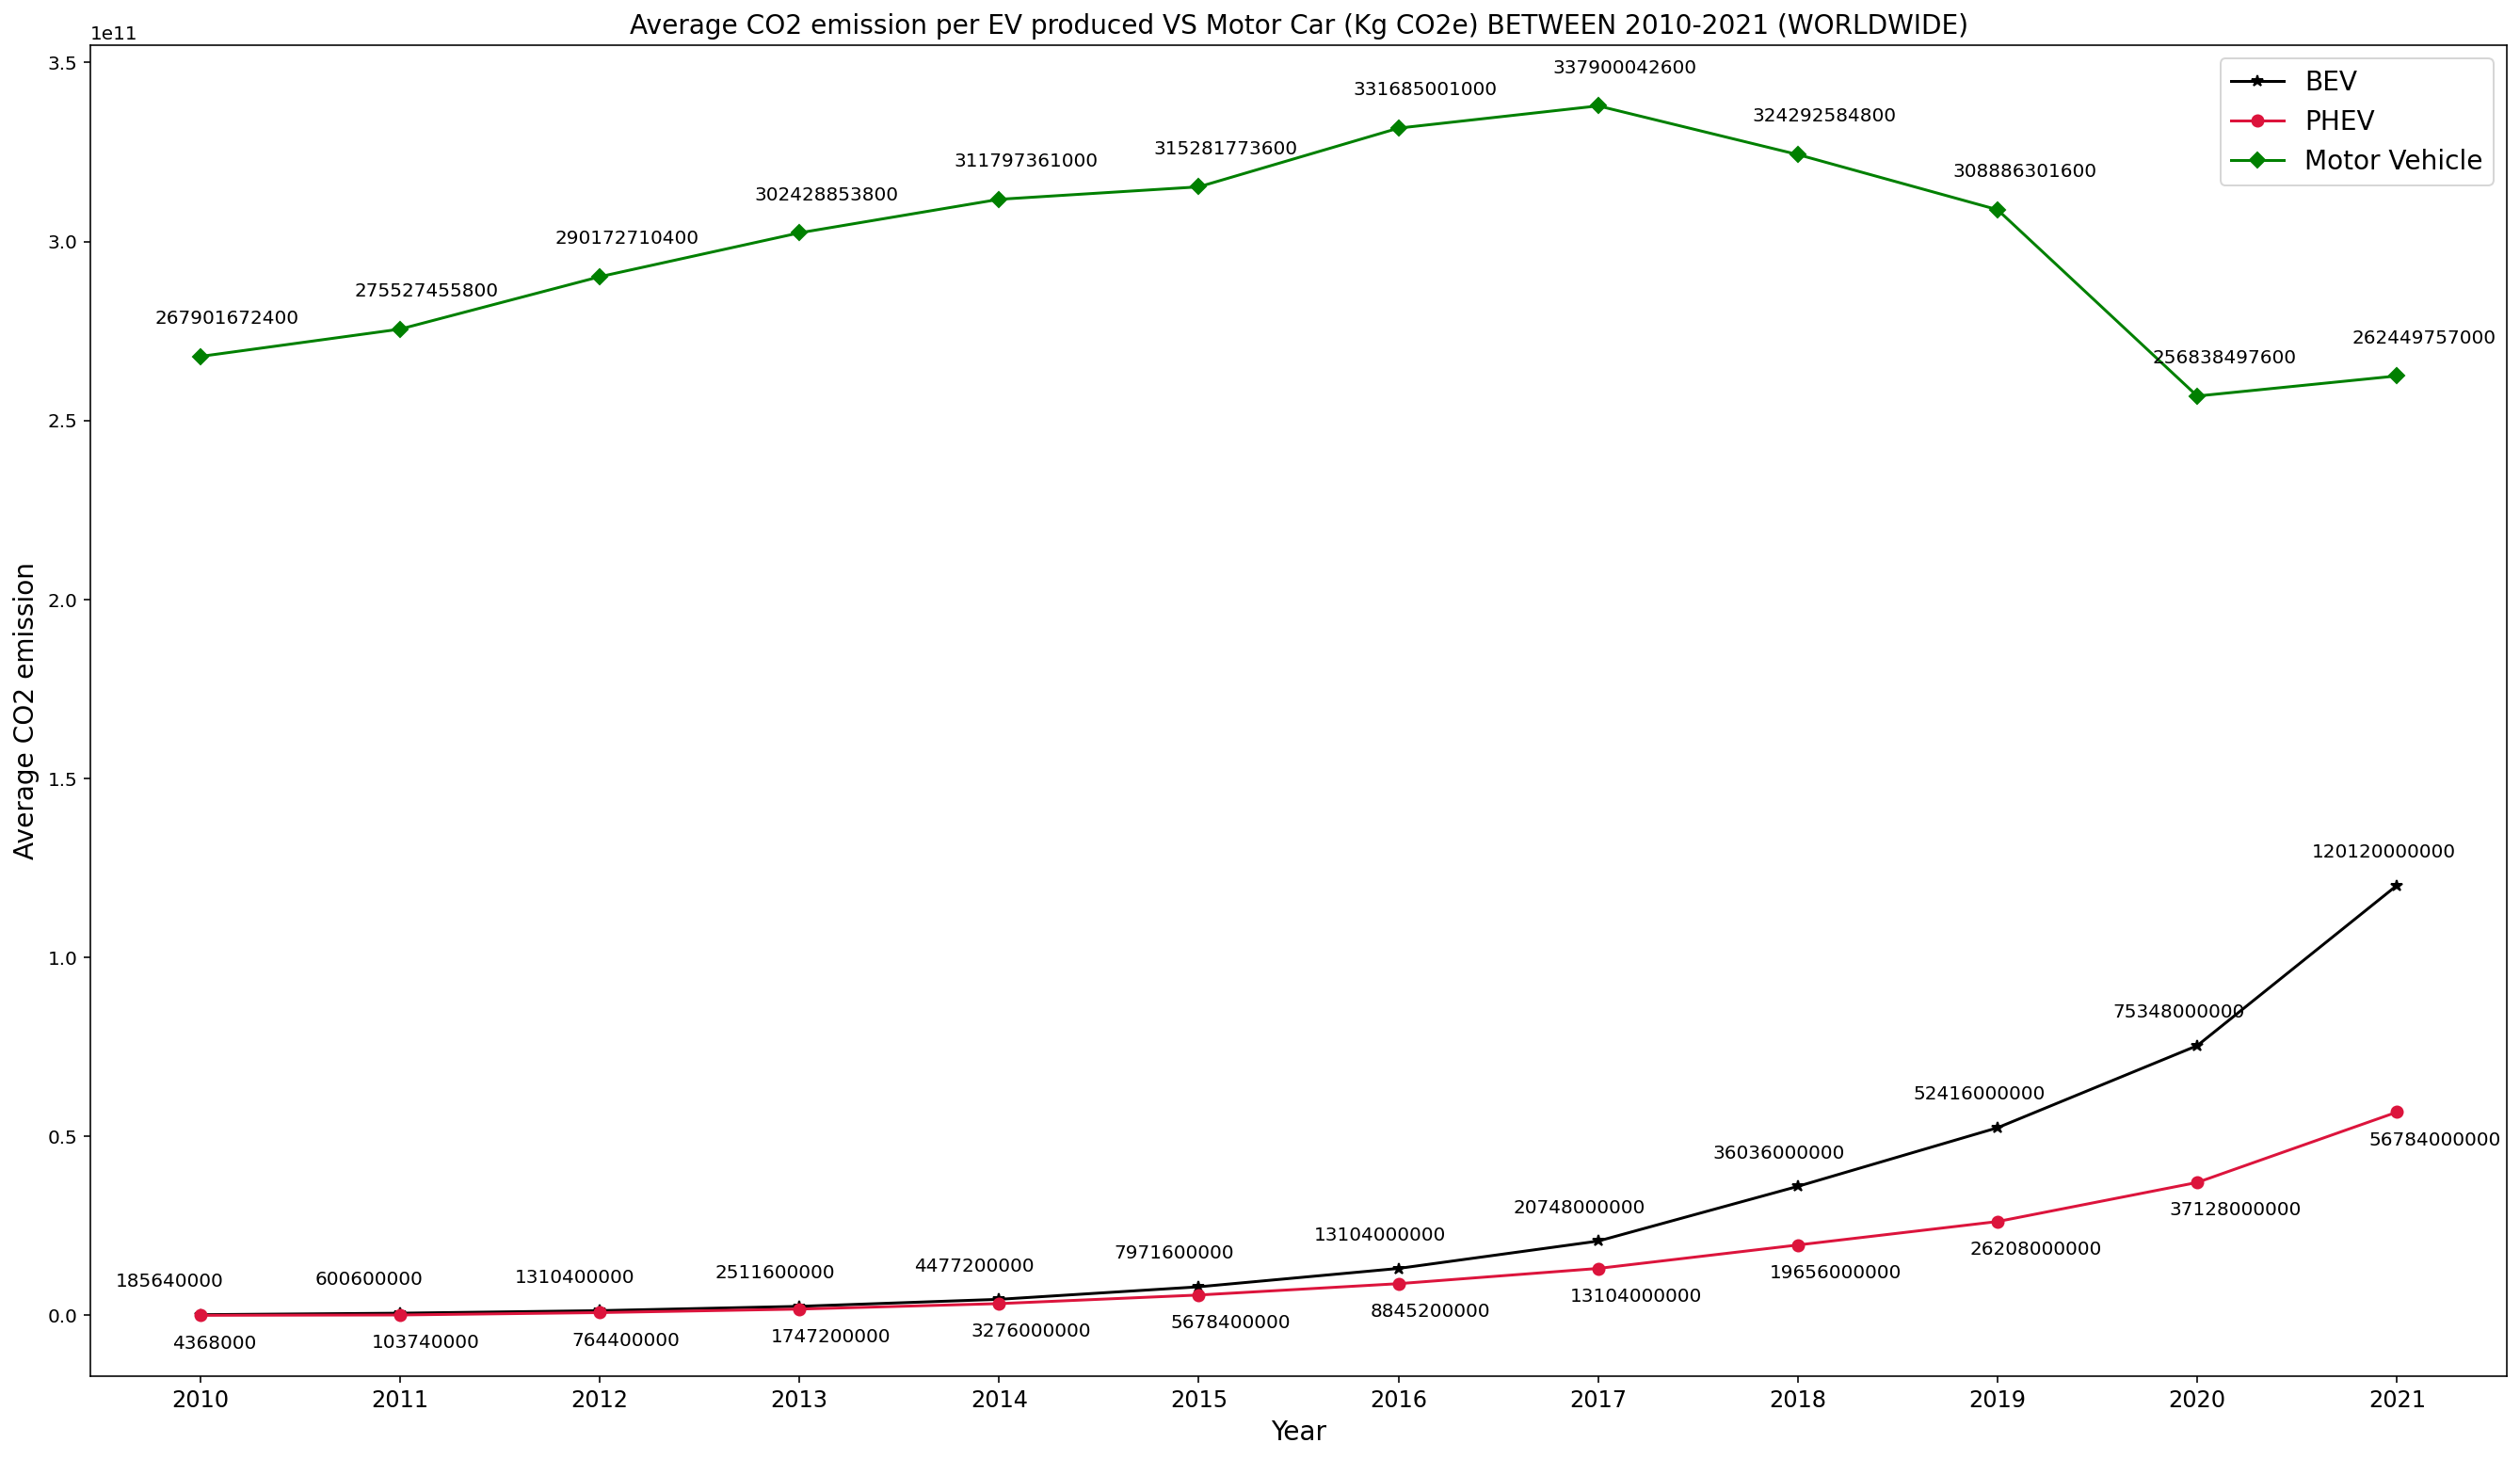

In [110]:
plt.rcParams['figure.figsize'] = (23, 13)
plt.rc('font', family='Open Sans')

fig,ax = plt.subplots()

# plot EV Stock BEV and add annotations to each point
ax.plot(cmp_data['Average CO2 emission per BEV produced (Kg CO2e)'], color='black', marker='*', label='BEV')
for i, val in enumerate(cmp_data['Average CO2 emission per BEV produced (Kg CO2e)']):
    ax.annotate('{:.0f}'.format(val), xy=(i, val), 
                xytext=(-45, 13), textcoords='offset points', 
                fontsize=10, va='bottom')

# plot EV Stock PHEV and add annotations to each point    
ax.plot(cmp_data['Average CO2 emission per PHEV produced (Kg CO2e)'], color='crimson', marker='o', label='PHEV')
for i, val in enumerate(cmp_data['Average CO2 emission per PHEV produced (Kg CO2e)']):
    ax.annotate('{:.0f}'.format(val), xy=(i, val), 
                xytext=(-15, -10), textcoords='offset points', 
                fontsize=10, va='top')
ax.plot(cmp_data['Average CO2 emission per Moto car'], color='green', marker='D', label='Motor Vehicle')
for i, val in enumerate(cmp_data['Average CO2 emission per Moto car']):
    ax.annotate('{:.0f}'.format(val), xy=(i, val), 
                xytext=(-24, 25), textcoords='offset points', 
                fontsize=10, va='top')

ax.set_title('Average CO2 emission per EV produced VS Motor Car (Kg CO2e) BETWEEN 2010-2021 (WORLDWIDE)',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Average CO2 emission',fontsize=14)
ax.legend(fontsize=14)

# Set tick positions to integers and set tick labels to corresponding year values
tick_pos = range(len(cmp_data))
tick_label = cmp_data.Year
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_label, ha='center', fontsize=12)

plt.show()


# Conclusion: There is a big difference between Average CO2 emission of Motor Vehicles and Electric Vehicles. 
# On an average motor vehicles cause more carbon emission than EVs. 
# Hence, we can say that EVs are more eco-friendly than motor vehicles.